all vaues of temperature are in degree celcius

case1, for nodes of figure 3.6  given in book

Numerical Solution (FDM):
[['T3' 'T4']
 ['T1' 'T2']]
= [[147.72609039 147.72609647]
 [252.2735555  252.27356136]]

Analytical infinite series Solution:
[[147.71266985 147.71266985]
 [252.28733015 252.28733015]]

error of interior nodes given in book figure3.6
[[0.01342054 0.01342662]
 [0.01377465 0.01376879]]

case1 for all values

Numerical Solution (FDM):
[[100.         100.         100.         ... 100.         100.
  100.        ]
 [100.         100.19007088 100.37929054 ... 100.37929074 100.19007098
  100.        ]
 [100.         100.38099301 100.76027846 ... 100.76027885 100.38099321
  100.        ]
 ...
 [100.         220.55927491 299.23971324 ... 299.2397136  220.55927509
  100.        ]
 [100.         299.80992703 378.68043322 ... 378.6804334  299.80992712
  100.        ]
 [500.         500.         500.         ... 500.         500.
  500.        ]]

Analytical infinite series Solut

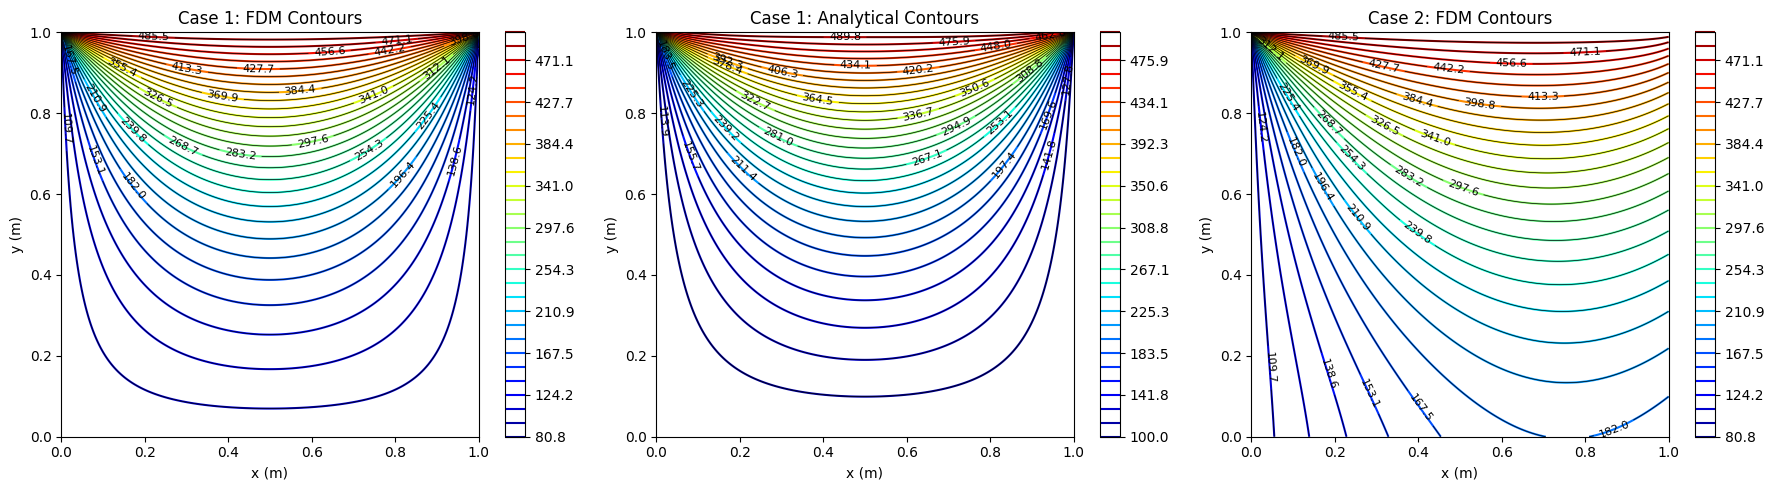

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import RectBivariateSpline

# Parameters
L = 1  # Length of the plate (m)
W = 1  # Width of the plate (m)
k = 10  # Thermal conductivity (W/m-K)
h = 10  # Convective heat transfer coefficient (W/m^2-K)
T_left = 100  # Temperature at left boundary (C)
T_bottom = 100  # Temperature at bottom boundary (C)
T_right = 100  # Temperature at right boundary (C)
T_top = 500  # Temperature at top boundary (C)
T_fluid = 100  # Fluid temperature for Case-2 (C)

# Grid size
nx, ny =49,49  # Number of grid points in x and y directions

# Initialize temperature arrays fdm
T_case1 = np.zeros((ny, nx))
T_case2 = np.zeros((ny, nx))

# Boundary conditions for Case-1
T_case1[:, 0] = T_left
T_case1[:, -1] = T_right
T_case1[0, :] = T_bottom
T_case1[-1, :] = T_top

# Boundary conditions for Case-2
T_case2[:, 0] = T_left
T_case2[-1, :] = T_top

# Solve using finite difference method(FDM)
def solve_fdm(T, nx, ny, k, h, T_fluid, case):
    max_iter = 10000
    tol = 1e-6
    
    for iter in range(max_iter):
        T_old = T.copy()
        
        # Update interior points
        for i in range(1, ny-1):
            for j in range(1, nx-1):
                T[i, j] = 0.25 * (T[i+1, j] + T[i-1, j] + T[i, j+1] + T[i, j-1])
        
        # Apply convection boundary conditions for Case-2
        if case == 2:
            # Bottom boundary (convection)
            for j in range(1, nx-1):
                T[0, j] = (h * T_fluid * dx/k +(T[0,j+1]+T[0,j-1])/2+ T[0+1, j]) / (2 + h * dx/k)
            
            # Right boundary (convection)
            for i in range(1, ny-1):
                T[i, -1] = (h * T_fluid * dx/k +(T[i+1,-1]+T[i-1,-1])/2 +T[i, -2]) / (2 + h * dx/k)
            
            # Bottom-right corner (convection on two sides)
            T[0, -1] = ( h * T_fluid * dx/k + (T[1, -1] + T[0, -2])/2) / (1+  h * dx/k)
        
        # Check for convergence
        if np.max(np.abs(T - T_old)) < tol:
            break
    
    return T

# Calculate grid spacing
dx = L / (nx-1)
dy = W / (ny-1 )

# Solve both cases
#Case1
T_case1 = solve_fdm(T_case1, nx, ny, k, h, T_fluid, case=1)
# Analytical infinite series solution for Case-1
def analytical_solution(x, y, T1=100, T2=500, W=1, H=1, terms=100):
    T_analytical = T1 + (T2 - T1) * (2 / np.pi) * sum(
        [((-1)**(n+1) + 1) * np.sin(n * np.pi * x / W) *
         np.sinh(n * np.pi * y / W) / (np.sinh(n * np.pi * H / W)*n)
         for n in range(1, terms+1)]
    )
    return T_analytical

# Compute analytical solution at grid points
x_vals = np.linspace(0, L, nx)
y_vals = np.linspace(0, W, ny)
T_analytical_grid = np.zeros((ny, nx))

for i in range(ny):
    for j in range(nx):
        T_analytical_grid[i, j] = analytical_solution(x_vals[j], y_vals[i])

# Compare numerical(fdm) and analytical solutions case 1
interior_nodes_fdm1 = T_case1[16:-16:16, 16:-16:16]
interior_nodes_analytical = T_analytical_grid[16:-16:16, 16:-16:16]

error1 = np.abs(interior_nodes_fdm1 - interior_nodes_analytical)
print('all vaues of temperature are in degree celcius')
print('\ncase1, for nodes of figure 3.6  given in book')
print("\nNumerical Solution (FDM):")
variable_matrix1 = np.array([
    ["T3", "T4"],
    ["T1", "T2"]])
print(variable_matrix1) 
print('=',interior_nodes_fdm1)

print("\nAnalytical infinite series Solution:")
print(interior_nodes_analytical)
print('\nerror of interior nodes given in book figure3.6')
print(error1)

error = np.abs(T_case1-T_analytical_grid)
print('\ncase1 for all values')
print("\nNumerical Solution (FDM):")
print(T_case1)
print("\nAnalytical infinite series Solution:")
print(T_analytical_grid)

print("\nError between FDM and Analytical Solution:")
print(error)
print('\n')
#case2
T_case2 = solve_fdm(T_case2, nx, ny, k, h, T_fluid, case=2)
#comparing nodes temperature in case2 with values provided in JP Holmann book
nodes_fdm2 = T_case2[0:-(16):(16), (16)::(16)]
variable_matrix2 = np.array([
    ["T7", "T8", "T9"],
    ["T4", "T5", "T6"],
    ["T1", "T2", "T3"]])
print('\nCase2''\n')
print(variable_matrix2)
print('values of nodes temperature(C) obtained from (fdm) by code') 
print('=',nodes_fdm2)
print('values of nodes temperature(C) given in the book')

#solution values of nodes from book
T1,T2,T3,T4,T5,T6,T7,T8,T9=280.67,330.3,309.38,192.38,231.15,217.19,157.7,184.71,175.62
given_values=np.array([T7,T8,T9,T4,T5,T6,T1,T2,T3]).reshape(3,3)
print(given_values)
print('\ncomparing nodes result as given in J P Holmann book for case 2')
print('\ndifference in values provided in book to solution obtained by code for case 2')
Difference=np.abs([[nodes_fdm2[0,0]-T7,nodes_fdm2[0,1]-T8,nodes_fdm2[0,2]-T9],
                    [nodes_fdm2[1,0]-T4,nodes_fdm2[1,1]-T5,nodes_fdm2[1,2]-T6],
                     [nodes_fdm2[2,0]-T1,nodes_fdm2[2,1]-T2, nodes_fdm2[2,2]-T3]])
print(Difference)
# If comparing with J.P. Holman values, do so here...
# e.g., T1_val, T2_val, etc., and differences

# -----------------------------
# 9) INTERPOLATE ONTO A FINE GRID FOR SMOOTH CONTOURS
# -----------------------------
n_fine = 200
x_fine = np.linspace(0, L, n_fine)
y_fine = np.linspace(0, W, n_fine)
X_fine, Y_fine = np.meshgrid(x_fine, y_fine)

# Interpolators
interp_case1 = RectBivariateSpline(y_vals, x_vals, T_case1)
T_case1_fine = interp_case1(y_fine, x_fine)

interp_analytical = RectBivariateSpline(y_vals, x_vals, T_analytical_grid)
T_ana_fine = interp_analytical(y_fine, x_fine)

interp_case2 = RectBivariateSpline(y_vals, x_vals, T_case2)
T_case2_fine = interp_case2(y_fine, x_fine)

#contour plot 
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Case 1 FDM  
ax1 = axes[0]
# Choose contour levels based on min/max
levels_case1 = np.linspace(T_case1_fine.min(), T_case1_fine.max(), 30)

# Filled contour
cf1 = ax1.contour(X_fine, Y_fine, T_case1_fine, levels=levels_case1, cmap='jet')
# Overlaid line contours (thin black lines)
c1 = ax1.contour(X_fine, Y_fine, T_case1_fine, levels=levels_case1, colors='black', linewidths=0.5)
ax1.clabel(c1, inline=True, fontsize=8)

ax1.set_title("Case 1: FDM Contours")
ax1.set_xlabel("x (m)")
ax1.set_ylabel("y (m)")
fig.colorbar(cf1, ax=ax1)

 #Case 1 Analytical 
ax2 = axes[1]
levels_ana = np.linspace(T_ana_fine.min(), T_ana_fine.max(), 30)

cf2 = ax2.contour(X_fine, Y_fine, T_ana_fine, levels=levels_ana, cmap='jet')
c2 = ax2.contour(X_fine, Y_fine, T_ana_fine, levels=levels_ana, colors='black', linewidths=0.5)
ax2.clabel(c2, inline=True, fontsize=8)

ax2.set_title("Case 1: Analytical Contours")
ax2.set_xlabel("x (m)")
ax2.set_ylabel("y (m)")
fig.colorbar(cf2, ax=ax2)

# Case 2 FDM
ax3 = axes[2]
levels_case2 = np.linspace(T_case2_fine.min(), T_case2_fine.max(), 30)

cf3 = ax3.contour(X_fine, Y_fine, T_case2_fine, levels=levels_case2, cmap='jet')
c3 = ax3.contour(X_fine, Y_fine, T_case2_fine, levels=levels_case2, colors='black', linewidths=0.5)
ax3.clabel(c3, inline=True, fontsize=8)

ax3.set_title("Case 2: FDM Contours")
ax3.set_xlabel("x (m)")
ax3.set_ylabel("y (m)")
fig.colorbar(cf3, ax=ax3)

plt.tight_layout()
plt.show()
